# Clustering

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from IPython.display import clear_output
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sns.set()
np.random.seed(42)
%matplotlib inline

In [2]:
df = pd.read_csv('data/main_dataset_no_outliers_v2.csv')
df.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,best_pos
0,184,192984,27,197,86,83,85,22000000,50000,0,...,40,11,19,17,83,79,79,82,83,2
1,193,188943,28,189,86,83,84,21500000,42000,1,...,62,15,14,10,82,77,79,83,85,2
2,205,159261,36,180,79,83,83,9500000,46000,1,...,84,35,21,15,6,7,5,4,4,1
3,206,163587,32,189,89,83,83,15500000,82000,1,...,67,14,14,13,82,77,79,79,88,2
4,221,190584,29,179,75,83,83,22000000,42000,1,...,79,83,83,80,15,7,11,14,12,3


In [3]:
feature = ['weak_foot', 'skill_moves', 'shooting', 'attacking_crossing',
        'attacking_finishing', 'attacking_volleys', 'skill_dribbling',
        'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
        'movement_agility', 'movement_balance', 'power_shot_power',
        'power_long_shots', 'mentality_positioning', 'mentality_vision',
        'mentality_penalties', 'goalkeeping_diving', 'goalkeeping_handling',
        'goalkeeping_kicking', 'goalkeeping_positioning',
        'goalkeeping_reflexes',
        'passing', 'dribbling', 'defending', 'physic'] #combine with my previous feature
data_selected = df[feature]
data_selected.head()

,weak_foot,skill_moves,shooting,attacking_crossing,attacking_finishing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_penalties,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,passing,dribbling,defending,physic
0,2,1,0.0,15,15,13,14,20,13,37,...,20,83,79,79,82,83,0.0,0.0,0.0,0.0
1,4,1,0.0,13,13,12,10,14,12,12,...,17,82,77,79,83,85,0.0,0.0,0.0,0.0
2,4,4,89.0,66,89,88,79,78,78,73,...,85,6,7,5,4,4,75.0,80.0,30.0,65.0
3,3,1,0.0,18,12,15,12,13,15,46,...,26,82,77,79,79,88,0.0,0.0,0.0,0.0
4,3,3,71.0,68,72,58,78,76,68,82,...,50,15,7,11,14,12,80.0,79.0,80.0,71.0


## Reduce dimension PCA
https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2


In [4]:
pca = PCA(n_components=2)
# X_std = data_selected
X_std = MinMaxScaler().fit_transform(data_selected)
X_transform = pca.fit_transform(X_std)

In [5]:
X_transform

array([[ 2.33441558, -0.75347754],
       [ 2.43607835, -0.75654796],
       [-1.39256979, -0.79285532],
       ...,
       [ 0.40506255,  0.43897955],
       [ 0.39837095,  0.34016525],
       [ 0.35128566,  0.39798591]])

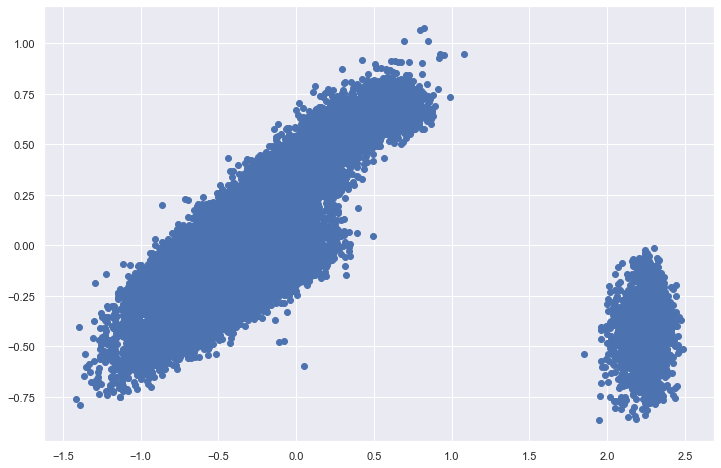

In [6]:
plt.figure(figsize=(12, 8))
plt.scatter(X_transform[:,0], X_transform[:,1])

### Define functions

In [7]:
def euclidean_distance(a, b): #calculate euclidean distance
    return np.sqrt(np.sum((a - b)**2))
def select_centroid(data, centroids):
    distances = [euclidean_distance(data, point) for point in centroids]
    return np.argmin(distances)
def is_convergen(old, new, K): #check is new clusters convergen or not, if convergen it will stop the loop
    distances = [euclidean_distance(old[i], new[i]) for i in range(K)]
    return sum(distances) == 0

In [8]:
def kMeans(X, K = 2, max_iter = 100, verbose = True):
    #Init
    X = np.array(X)
    n_data, n_feature = X.shape
    y = np.full(n_data, -1)
    cancel_token = True
    i = 0
    rand_c = np.random.choice(n_data, K, replace=False)
    centroids = [np.array(X[idx]) for idx in rand_c]
    
    while(i < max_iter and cancel_token):
        for idx, row in enumerate(X):
            y[idx] = select_centroid(row, centroids)
        old_centroids = centroids #save old centroids
        #update new centroids
        temp = np.zeros((K, n_feature))
        for cluster in range(K) : #for each member of cluster, get mean value
            idx = np.where( y == cluster)
            temp[cluster] = np.mean(X[idx],axis = 0)
        centroids = temp #UPDATE!
        if is_convergen(old_centroids, centroids, K):
            cancel_token = False
        i+=1
        if verbose:
            print('iteration: %i, K: %i'% (i, K))
            clear_output(wait=True)
    return y, centroids

In [9]:
def sse_score(X, centroids):
    score = 0
    for row in X:
        distances = [euclidean_distance(row, point) for point in centroids]
        score += min(distances)**2
    return score
def plot_cluster(X, label, center):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis')
    plt.scatter(center[:, 0], center[:, 1], marker="x", c='black');
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
def plot_silhouette(X, n_cluster_labels, silhouette_values, range_n_clusters, n_centers):
#     https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    import matplotlib.cm as cm
    for idx,n_clusters in enumerate(range_n_clusters):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(16, 5)
        cluster_labels = n_cluster_labels[idx]
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

 

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = np.mean(silhouette_values[idx])
        print("For K =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        sample_silhouette_values = silhouette_values[idx]

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = n_centers[idx]
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

### Main Program

Define parameters

In [10]:
K = 2
max_iter = 20

In [11]:
y_pred, center = kMeans(X_transform, K, max_iter)

iteration: 10, K: 2


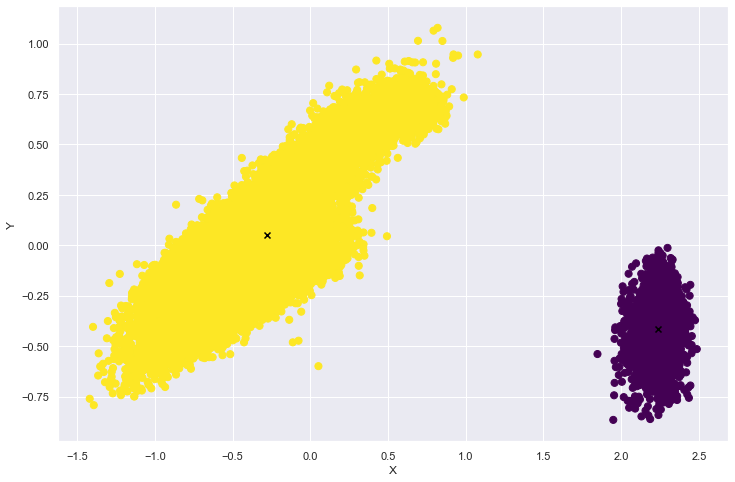

In [12]:
plot_cluster(X_transform,y_pred,center)

## Evaluate Score

Using silhouette coefficient

![Function](sihouette.jpg)

https://medium.com/@ODSC/assessment-metrics-for-clustering-algorithms-4a902e00d92d

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
result = silhouette_samples(X_transform,y_pred)
np.mean(result)

0.7570388137956855

### Test using sklearn lib

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_transform)
pred = kmeans.predict(X_transform)

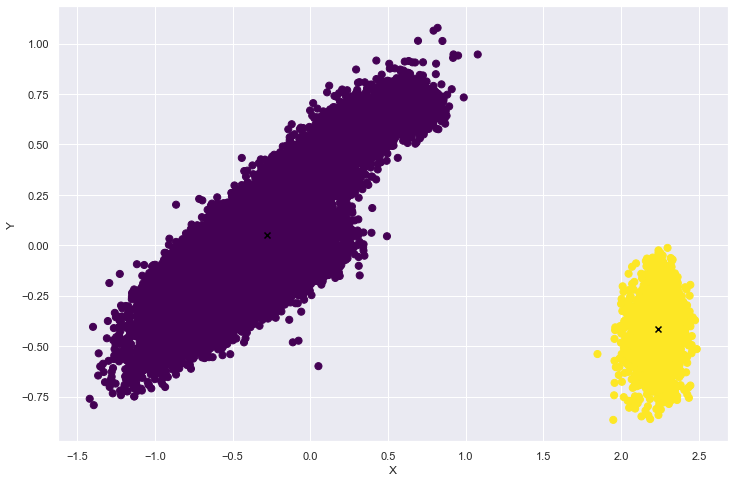

In [16]:
plot_cluster(X_transform,pred,kmeans.cluster_centers_)

## Elbow method & Silhouette coefficient analysis

In [17]:
silhouette = []
scores = []
results = []
centers = []
for K in range(2,11):
    y_pred, center = kMeans(X_transform, K, max_iter)
    results.append(y_pred)
    centers.append(center)
    silhouette.append(silhouette_samples(X_transform,y_pred))
    scores.append(sse_score(X_transform,center))

iteration: 92, K: 10


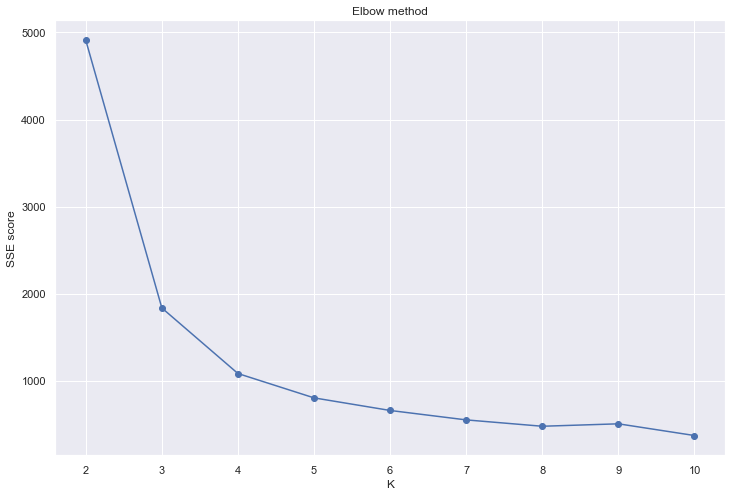

In [18]:
Ks = np.array(range(2,11))
plt.figure(figsize=(12, 8))
plt.title('Elbow method')
plt.plot(Ks, scores, marker='o', ls='-')
plt.xlabel('K')
plt.ylabel('SSE score')
plt.show()

For K = 2 The average silhouette_score is : 0.7570388137956855
For K = 3 The average silhouette_score is : 0.5652004169455973
For K = 4 The average silhouette_score is : 0.5010111407951867
For K = 5 The average silhouette_score is : 0.4576757388108166
For K = 6 The average silhouette_score is : 0.4310840051426124
For K = 7 The average silhouette_score is : 0.4481167742905359
For K = 8 The average silhouette_score is : 0.4546658502702595
For K = 9 The average silhouette_score is : 0.39118214312435473
For K = 10 The average silhouette_score is : 0.44404387151595853


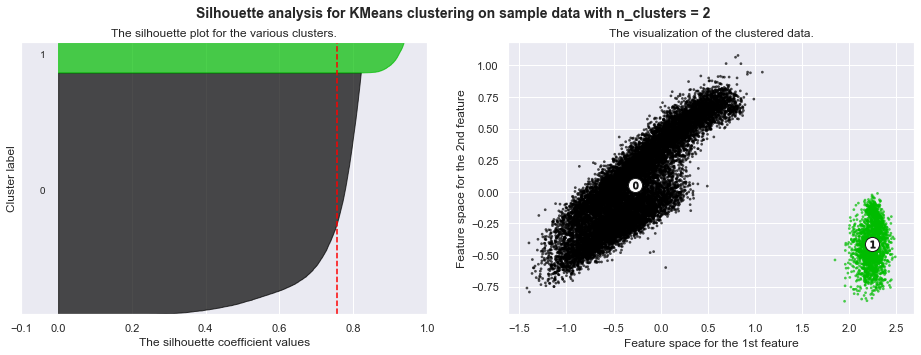

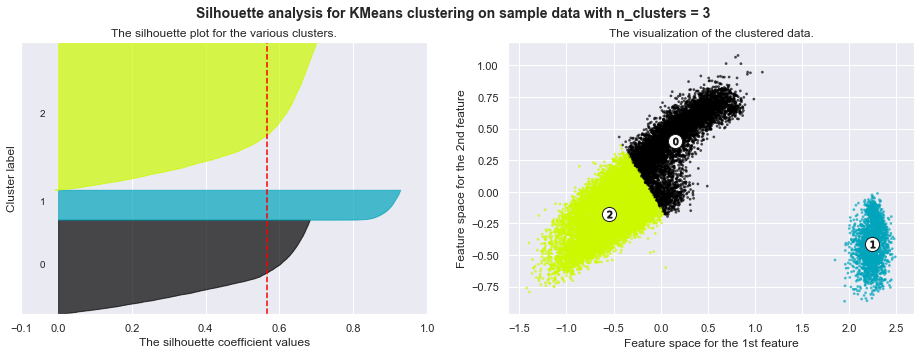

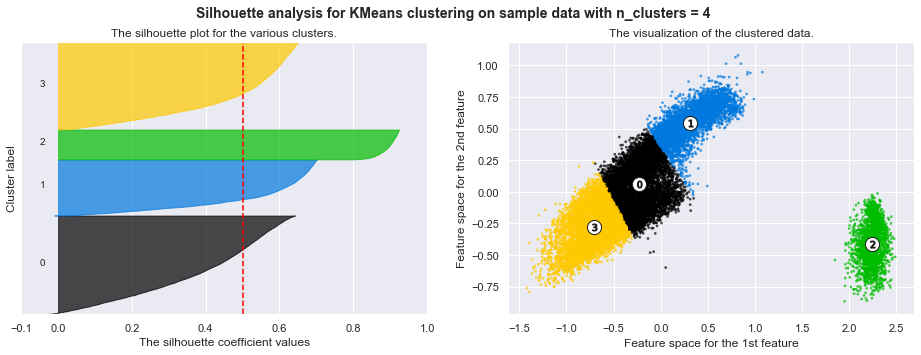

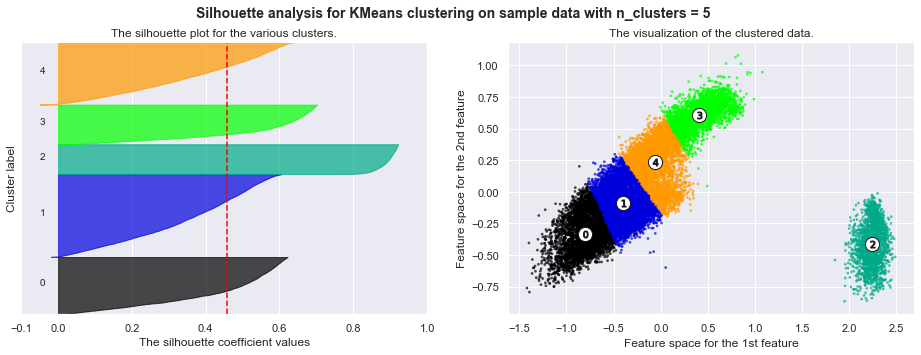

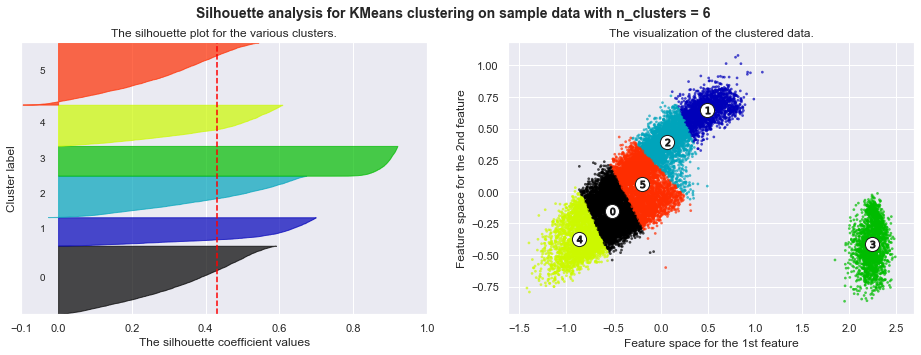

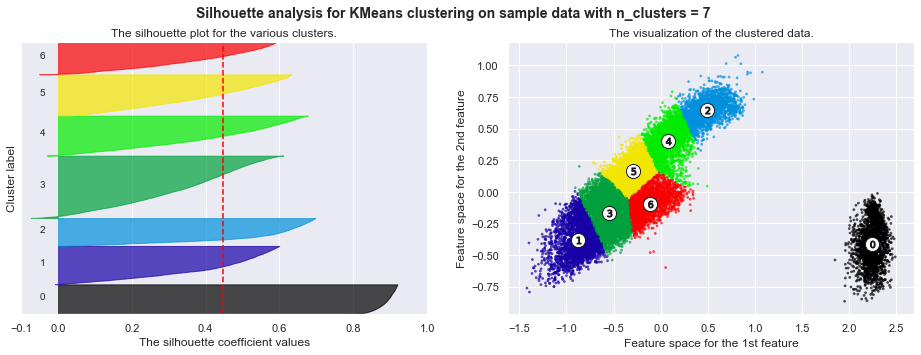

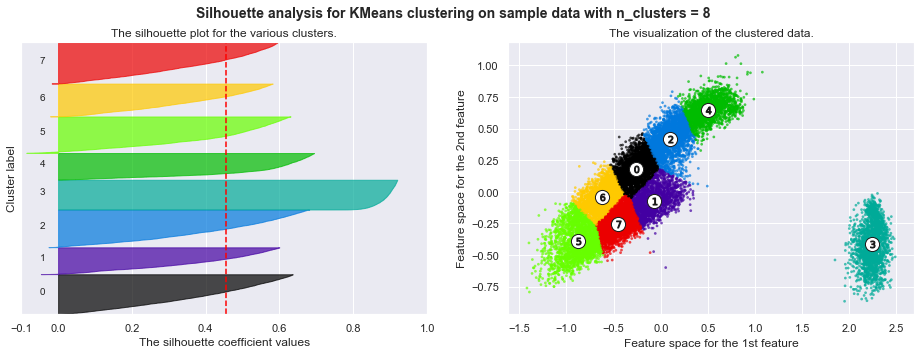

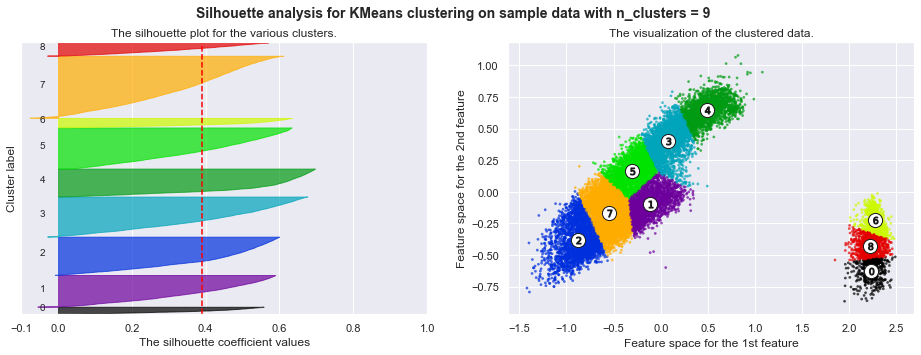

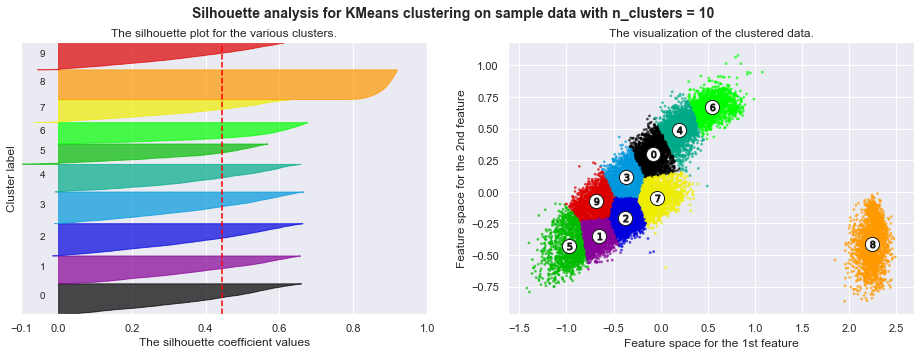

In [19]:
plot_silhouette(X=X_transform, n_cluster_labels=results, silhouette_values=silhouette, range_n_clusters=Ks, n_centers = centers)

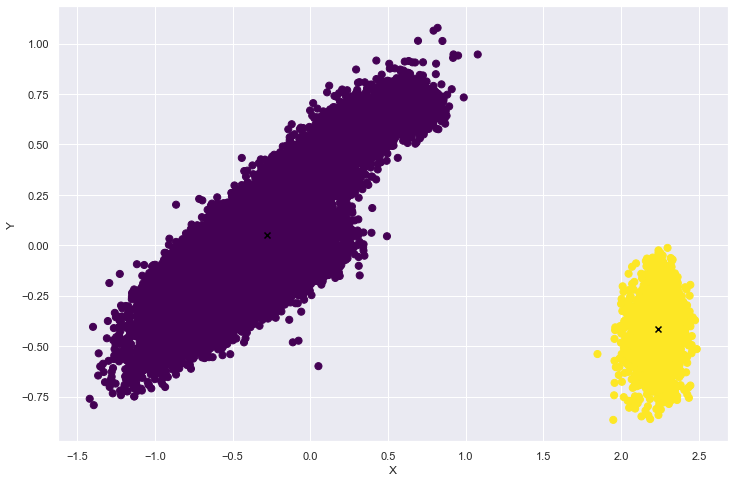

In [20]:
plot_cluster(X_transform,results[0],centers[0])